In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [228]:
from collections import Counter

In [663]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [435]:
y = train['SalePrice']

In [436]:
trainID = train['Id']
testID = test['Id']

In [437]:
train = train.drop(columns = ['SalePrice'])

In [438]:
full = pd.concat([train,test], ignore_index=True, sort = False)

In [439]:
def to_str(dataset):
    dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)
    dataset['YrSold'] = dataset['YrSold'].astype(str)
    dataset['MoSold'] = dataset['MoSold'].astype(str)

In [440]:
to_str(full)
to_str(train)
to_str(test)

In [441]:
categorical_features = full.select_dtypes(include=[np.object])
numeric_features = full.select_dtypes(include=[np.number])

In [255]:
for i in list(full):
    if full[i].isnull().sum() != 0:
        print(i)
        print(full[full[i].isnull()]['Id'])
        print('-'*50)

MSZoning
1915    1916
2216    2217
2250    2251
2904    2905
Name: Id, dtype: int64
--------------------------------------------------
LotFrontage
7          8
12        13
14        15
16        17
24        25
31        32
42        43
43        44
50        51
64        65
66        67
76        77
84        85
95        96
100      101
104      105
111      112
113      114
116      117
120      121
126      127
131      132
133      134
136      137
147      148
149      150
152      153
153      154
160      161
166      167
        ... 
2684    2685
2700    2701
2703    2704
2704    2705
2706    2707
2707    2708
2708    2709
2709    2710
2714    2715
2715    2716
2724    2725
2727    2728
2737    2738
2738    2739
2741    2742
2764    2765
2807    2808
2810    2811
2811    2812
2812    2813
2814    2815
2815    2816
2818    2819
2839    2840
2845    2846
2847    2848
2850    2851
2900    2901
2901    2902
2908    2909
Name: Id, Length: 486, dtype: int64
------------------------

In [10]:
# Missing Data

In [11]:
# Numeric missing data. 

In [164]:
full2 = full.copy()

In [165]:
def percent_missing(dataframe):
    return dataframe.isnull().sum()/dataframe.isnull().count()

In [471]:
missing_table = pd.concat([train.isnull().sum(),percent_missing(train),
                          test.isnull().sum(),percent_missing(test),
                          full.isnull().sum(), percent_missing(full)], axis=1, 
                         keys=['Total_train', 'Percent_train', 'Total_test', 'Percent_test',
                              'Total_full', 'Percent_full'], sort = False)

In [472]:
temp = missing_table[missing_table.Total_full!=0]

In [473]:
temp = temp.reset_index()

In [474]:
temp.shape

(34, 7)

In [708]:
full[full.PoolQC.isnull()][full.PoolArea>0]['PoolArea']

/Users/lujian/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


2420    368
2503    444
2599    561
Name: PoolArea, dtype: int64

In [700]:
pools = full[-full.PoolQC.isnull()]

In [714]:
misc = full[-full.MiscFeature.isnull()]

In [734]:
full[full.KitchenQual.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1555,1556,50,RL,72.0,10632,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal


In [731]:
a2 = full.iloc[2549,:]

In [732]:
def most_similar(ID):
    similarity_score = []
    for index, row in misc.iterrows():
        if similarity(a2,row) != 1:
            similarity_score.append(similarity(a2,row))
    index = similarity_score.index(max(similarity_score))
    print(max(similarity_score),
          misc.iloc[index,:]['Id'],misc.iloc[index,:]['MiscFeature'])

In [733]:
most_similar(2549)

0.5869565217391305 2317 Shed


In [475]:
temp

,index,Total_train,Percent_train,Total_test,Percent_test,Total_full,Percent_full
0,MSZoning,0,0.000000,1,0.000685,4,0.001370
1,LotFrontage,259,0.177397,228,0.156164,486,0.166495
2,Alley,1369,0.937671,1353,0.926712,2721,0.932169
3,Utilities,0,0.000000,1,0.000685,2,0.000685
4,Exterior1st,0,0.000000,1,0.000685,1,0.000343
5,Exterior2nd,0,0.000000,1,0.000685,1,0.000343
6,MasVnrType,8,0.005479,15,0.010274,24,0.008222
7,MasVnrArea,8,0.005479,16,0.010959,23,0.007879
8,BsmtQual,37,0.025342,45,0.030822,81,0.027749
9,BsmtCond,37,0.025342,46,0.031507,82,0.028092


In [419]:
# Missing Categorical Values that's not NA. Impute them with the most
# similar ones in the dataset. 

In [ ]:
temp3 = categorical_features.copy()
for i in temp3:
    temp3.loc[temp3[i].isnull(),i] = 'none'

In [745]:
def similarity(row1,row2):
    score = 0
    for variable in categorical_features:
        if row1[variable] == row2[variable]:
            score += 1
    return score/len(list(categorical_features))

In [764]:
#2040,2185,2524
most_similar(2219)

0.782608695652174 1842 TA


In [758]:
most_similar(2218)

0.9130434782608695 705 Gd


In [762]:
most_similar(2525)

0.8695652173913043 1590 TA


In [ ]:
MSZoninglist = [1916,2217,2251,2905]
for i in MSZoninglist:
    print(most_similar(i))

In [442]:
# Now transfer all MSZoning to RL type in the test dataset. 
test.loc[test.MSZoning.isnull(),'MSZoning'] = 'RL'

In [377]:
# The missing points for Utilities are 1916 and 1946. 
most_similar(1916)
most_similar(1946)
# The most similar data points are 1586 and 522, both have Utility type
# of AllPub

0.717391304347826 1586 Id                  1586
MSSubClass            30
MSZoning              RL
LotFrontage           67
LotArea             8777
Street              Pave
Alley                NaN
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Mod
Neighborhood     Edwards
Condition1         Feedr
Condition2          Norm
BldgType            1Fam
HouseStyle        1Story
OverallQual            3
OverallCond            6
YearBuilt           1945
YearRemodAdd        2007
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType          None
MasVnrArea             0
ExterQual             TA
ExterCond             Gd
Foundation        CBlock
                  ...   
HalfBath               0
BedroomAbvGr           2
KitchenAbvGr           1
KitchenQual           TA
TotRmsAbvGrd           5
Functional          Min1
Fireplaces             0
FireplaceQu          NaN
Ga

In [443]:
# Now impute the missing values of Utilities to AllPub. 
test.loc[test.Utilities.isnull(),'Utilities'] = 'AllPub'
test.Utilities.isnull().sum()

0

In [379]:
# Exterior1st and exterior2nd has the same missing datapoints
most_similar(2152)
# the most similar datapoint is 563 with WdShing and Wd Shng

0.8043478260869565 563 Id                   563
MSSubClass            30
MSZoning              RL
LotFrontage           63
LotArea            13907
Street              Pave
Alley                NaN
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     Edwards
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        1Story
OverallQual            5
OverallCond            6
YearBuilt           1940
YearRemodAdd        1969
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      WdShing
Exterior2nd      Wd Shng
MasVnrType          None
MasVnrArea             0
ExterQual             TA
ExterCond             TA
Foundation        CBlock
                  ...   
HalfBath               0
BedroomAbvGr           3
KitchenAbvGr           1
KitchenQual           TA
TotRmsAbvGrd           6
Functional           Typ
Fireplaces             1
FireplaceQu           Gd
Ga

In [444]:
test.loc[test.Exterior1st.isnull(),'Exterior1st'] = 'WdShing'
test.loc[test.Exterior2nd.isnull(),'Exterior2nd'] = 'Wd Shng'

In [445]:
test.Exterior1st.isnull().sum()
test.Exterior2nd.isnull().sum()

0

In [403]:
# Electrical
most_similar(1380)

0.9347826086956522 2229 SBrkr


In [446]:
train.loc[train.Electrical.isnull(),'Electrical'] = 'Sbrkr'
train.Electrical.isnull().sum()

0

In [406]:
#Kitchen Quality
most_similar(1556)

0.717391304347826 1236 TA


In [447]:
train.loc[train.KitchenQual.isnull(),'KitchenQual'] = 'TA'
train.KitchenQual.isnull().sum()

0

In [412]:
#Functional missing point: 2217,2474, test set. 
most_similar(2217) #Typ
most_similar(2474) #Typtrain.loc[train.KitchenQual.isnull(),'KitchenQual'] = 'TA'
train.KitchenQual.isnull().sum()

0.6739130434782609 534 Typ
0.717391304347826 875 Typ


In [448]:
test.loc[test.Functional.isnull(),'Functional'] = 'Typ'
test.Functional.isnull().sum()

0

In [415]:
# SaleType, missing 2490, test set
most_similar(2490)

0.8043478260869565 1027 WD


In [449]:
test.loc[test.SaleType.isnull(),'SaleType'] = 'WD'
test.SaleType.isnull().sum()

0

In [ ]:
# Now have a look at the MasVnrArea and MasVnrType. There is one datapoint 
# where there is an area but no type. It's in the test set. From the boxplot
# I don't find a relationship between the area and the type.
# So I will use the similarity function to impute this datapoint. 

In [430]:
full.iloc[2610,:]['MasVnrArea']

198.0

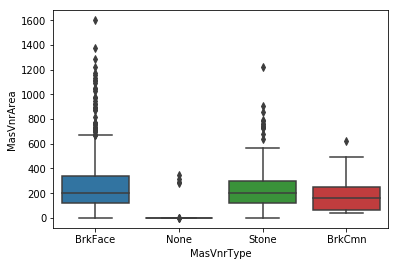

In [428]:
sns.boxplot(full.MasVnrType,full.MasVnrArea)

In [432]:
most_similar(2611)

0.782608695652174 623 BrkFace


In [455]:
# Get the index of this missing value in the test set. 
test[test.Id==2611].index

Int64Index([1150], dtype='int64')

In [458]:
# Change the nan value to BrkFace. 
test.loc[1150,'MasVnrType'] = 'BrkFace'
test.MasVnrType.isnull().sum()

15

In [504]:
# Now let's have a look at the Basement Variables. 
bsmtcols = ['Id','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
           'BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF',
            'TotalBsmtSF','BsmtFullBath','BsmtHalfBath']


In [505]:
# Only look at the basement variables. 
bsmt = full[bsmtcols]

In [523]:
bsmt[bsmt.isnull().any(axis=1)].shape

(88, 12)

In [611]:
newbsmt = full[['Id','BsmtQual','BsmtCond','BsmtExposure',
                'BsmtFinType1','BsmtFinType2']]

In [612]:
miss = newbsmt[newbsmt.isnull().any(axis=1)]

In [615]:
miss[newbsmt.isnull().sum(axis=1)<5]

/Users/lujian/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Id,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
332,333,Gd,TA,No,GLQ,NaN
948,949,Gd,TA,NaN,Unf,Unf
1487,1488,Gd,TA,NaN,Unf,Unf
2040,2041,Gd,NaN,Mn,GLQ,Rec
2185,2186,TA,NaN,No,BLQ,Unf
2217,2218,NaN,Fa,No,Unf,Unf
2218,2219,NaN,TA,No,Unf,Unf
2348,2349,Gd,TA,NaN,Unf,Unf
2524,2525,TA,NaN,Av,ALQ,Unf


In [628]:
bsmt[bsmt.TotalBsmtSF>0][['BsmtQual','BsmtCond','BsmtExposure',
                'BsmtFinType1','BsmtFinType2']].isnull().sum()

BsmtQual        2
BsmtCond        3
BsmtExposure    3
BsmtFinType1    0
BsmtFinType2    1
dtype: int64

In [618]:
# Except Id 2121, all NA values in basement type 1 means there is
# no basement 1. When imputing, impute all basement1 type to none.
bsmt[bsmt.BsmtFinType1.isnull()][bsmt.BsmtFinSF1==0].shape

/Users/lujian/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(78, 12)

In [620]:
# For basement 2, Id333, basement type2 missing with a basement2 area. 
# this type should be imputed.All other points with an 0 in the area
# are NA in the type. Meaning there is no basement 2 in this row.
bsmt[bsmt.BsmtFinType2.isnull()][bsmt.BsmtFinSF2>0]

/Users/lujian/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Id,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
332,333,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


In [ ]:
# TO conlude, for basement, the data points that need special attention
# are 333,949,1488,2041,2186,2189,2218,2219,2349,2525.

In [638]:
# Impute id 2189 and 2121 numeric NA values to 0 since they are missing and 
# there is no evidence to support that there is a number for them.
test[test.Id==2189].index
test.loc[728,'BsmtFullBath']=0
test.loc[728,'BsmtHalfBath']=0

In [646]:
test[test.Id==2121].index
test.loc[660,'BsmtFinSF1']=0
test.loc[660,'BsmtFinSF2']=0
test.loc[660,'BsmtUnfSF']=0
test.loc[660,'BsmtFullBath']=0
test.loc[660,'TotalBsmtSF']=0
test.loc[660,'BsmtHalfBath']=0

In [ ]:
# Take a look at the basement data and make sure we did the right thing.

In [647]:
testbsmt = test[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
     'BsmtFullBath','TotalBsmtSF','BsmtHalfBath']]

In [655]:
testbsmt[testbsmt.isnull().any(axis=1)]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,TotalBsmtSF,BsmtHalfBath
728,0.0,0.0,0.0,0.0,0.0,NaN
2610,NaN,NaN,NaN,NaN,NaN,NaN


In [661]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,20,RH,80.0,11622.0,Pave,NaN,Reg,Lvl,AllPub,...,120.0,0.0,NaN,MnPrv,NaN,0.0,6,2010,WD,Normal
1,1462.0,20,RL,81.0,14267.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,NaN,Gar2,12500.0,6,2010,WD,Normal
2,1463.0,60,RL,74.0,13830.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,MnPrv,NaN,0.0,3,2010,WD,Normal
3,1464.0,60,RL,78.0,9978.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,6,2010,WD,Normal
4,1465.0,120,RL,43.0,5005.0,Pave,NaN,IR1,HLS,AllPub,...,144.0,0.0,NaN,NaN,NaN,0.0,1,2010,WD,Normal
5,1466.0,60,RL,75.0,10000.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,4,2010,WD,Normal
6,1467.0,20,RL,NaN,7980.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,GdPrv,Shed,500.0,3,2010,WD,Normal
7,1468.0,60,RL,63.0,8402.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,5,2010,WD,Normal
8,1469.0,20,RL,85.0,10176.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2010,WD,Normal
9,1470.0,20,RL,70.0,8400.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,MnPrv,NaN,0.0,4,2010,WD,Normal


In [621]:
bsmt[bsmt.isnull().sum(axis=1)<11]

,Id,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,1,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,1.0,0.0
1,2,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,0.0,1.0
2,3,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,1.0,0.0
3,4,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,1.0,0.0
4,5,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,1.0,0.0
5,6,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,1.0,0.0
6,7,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,1.0,0.0
7,8,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,1.0,0.0
8,9,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,0.0,0.0
9,10,TA,TA,No,GLQ,851.0,Unf,0.0,140.0,991.0,1.0,0.0


In [662]:
full

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [170]:
missing_categorical = []
for i in temp['index']:
    if i in list(categorical_features):
        missing_categorical.append(i)

In [171]:
missing_categorical

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [172]:
# For variables where NA means there is no such thing in this house explicitly uttered in the data description file, impute categorical variables with 'none'.
# The variables with such characteristics are: 
NA_as_None = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
              'BsmtFinType2','FireplaceQu','GarageType','GarageFinish',
              'GarageQual','GarageCond','PoolQC','Fence','MiscFeature',
             ]

In [173]:
# Impute the categorical variables. If it's NA, impute to none.
def impute_with_none(list_of_features,dataset):
    for feature in list_of_features:
        dataset.loc[dataset[feature].isnull(),feature] = 'none'

In [200]:
impute_with_none(NA_as_None,full2)

In [201]:
impute_with_none(NA_as_None,train)
impute_with_none(NA_as_None,test)

In [175]:
missing_table2 = pd.concat([train.isnull().sum(),percent_missing(train),
                          test.isnull().sum(),percent_missing(test),
                          full2.isnull().sum(), percent_missing(full2)], axis=1, 
                         keys=['Total_train', 'Percent_train', 'Total_test', 'Percent_test',
                              'Total_full', 'Percent_full'], sort = False)

In [176]:
missing_table2[missing_table2.Total_full>0]

,Total_train,Percent_train,Total_test,Percent_test,Total_full,Percent_full
MSZoning,0,0.000000,4.0,0.002742,4.0,0.001370
LotFrontage,259,0.177397,227.0,0.155586,486.0,0.166495
Utilities,0,0.000000,2.0,0.001371,2.0,0.000685
Exterior1st,0,0.000000,1.0,0.000685,1.0,0.000343
Exterior2nd,0,0.000000,1.0,0.000685,1.0,0.000343
MasVnrType,8,0.005479,16.0,0.010966,24.0,0.008222
MasVnrArea,8,0.005479,15.0,0.010281,23.0,0.007879
BsmtFinSF1,0,0.000000,1.0,0.000685,1.0,0.000343
BsmtFinSF2,0,0.000000,1.0,0.000685,1.0,0.000343
BsmtUnfSF,0,0.000000,1.0,0.000685,1.0,0.000343


In [107]:
impute_with_none(NA_as_None,categorical_features)

/Users/lujian/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/lujian/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [109]:
categorical_features.isnull().sum()

MSZoning          4
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       24
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       1
Functional        2
FireplaceQu       0
GarageType        0
GarageFinish      0
GarageQual        0
GarageCond        0
PavedDrive        0
PoolQC            0
Fence             0
MiscFeature       0
SaleType          1
SaleCondition     0
dtype: int64

In [105]:
train['PoolArea'][train['PoolQC'].isnull()==True].describe()

count    1453.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: PoolArea, dtype: float64

In [94]:
a = full[full.PoolQC.isnull()]['PoolArea']
a[a>0]

2420    368
2503    444
2599    561
Name: PoolArea, dtype: int64

In [80]:
full[full.MasVnrArea.isnull()]['Id']

234      235
529      530
650      651
936      937
973      974
977      978
1243    1244
1278    1279
1691    1692
1706    1707
1882    1883
1992    1993
2004    2005
2041    2042
2311    2312
2325    2326
2340    2341
2349    2350
2368    2369
2592    2593
2657    2658
2686    2687
2862    2863
Name: Id, dtype: int64

In [49]:
numeric_missing = numeric_features.isnull().sum()
numeric_missing[numeric_missing>0].sort_values(ascending = False)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
GarageArea        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
dtype: int64

In [27]:
categorical_missing = categorical_features.isnull().sum()
categorical_missing[categorical_missing>0].sort_values(ascending = False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Utilities          2
Exterior1st        1
SaleType           1
Exterior2nd        1
KitchenQual        1
Electrical         1
dtype: int64

In [26]:
numeric_features.corr()['LotFrontage'].sort_values(ascending = False)

LotFrontage      1.000000
LotArea          0.489896
1stFlrSF         0.458247
GrLivArea        0.382462
GarageArea       0.359786
TotalBsmtSF      0.354822
TotRmsAbvGrd     0.349513
GarageCars       0.310587
Fireplaces       0.261970
BedroomAbvGr     0.234892
MasVnrArea       0.221079
BsmtFinSF1       0.219408
OverallQual      0.217645
FullBath         0.181668
PoolArea         0.174119
OpenPorchSF      0.164896
YearBuilt        0.122811
WoodDeckSF       0.122070
BsmtUnfSF        0.113714
BsmtFullBath     0.113245
YearRemodAdd     0.091557
GarageYrBlt      0.076673
ScreenPorch      0.075858
BsmtFinSF2       0.047431
MiscVal          0.044272
HalfBath         0.039452
3SsnPorch        0.028289
2ndFlrSF         0.026545
EnclosedPorch    0.011509
MoSold           0.011254
LowQualFinSF     0.004894
KitchenAbvGr     0.004676
YrSold          -0.007917
BsmtHalfBath    -0.025629
Id              -0.027549
OverallCond     -0.075508
MSSubClass      -0.417359
Name: LotFrontage, dtype: float64

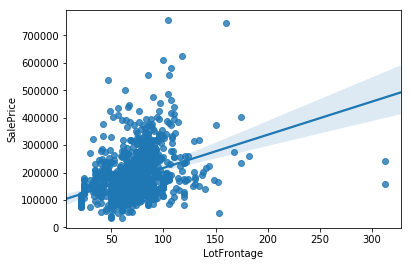

In [738]:
sns.regplot(train.LotFrontage,y)

/Users/lujian/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


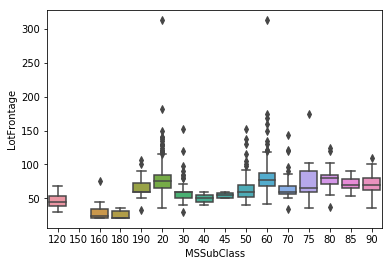

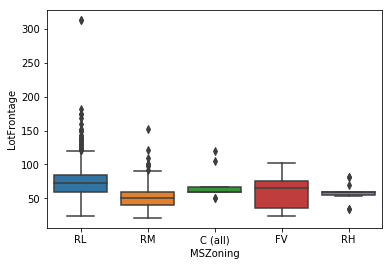

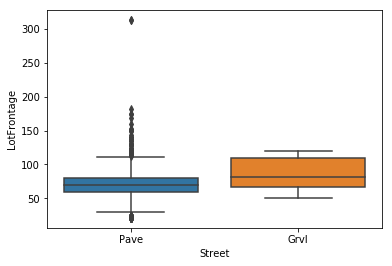

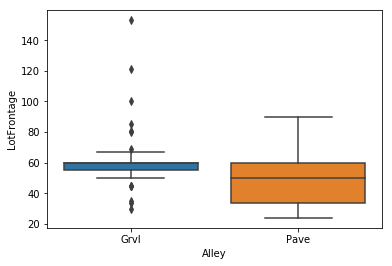

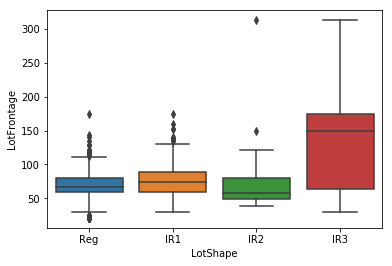

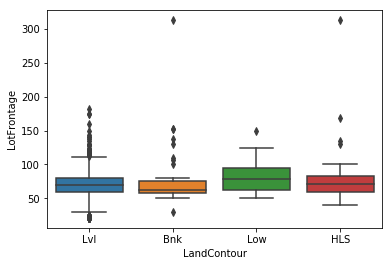

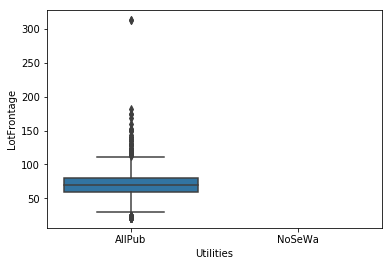

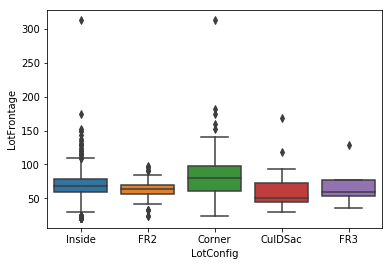

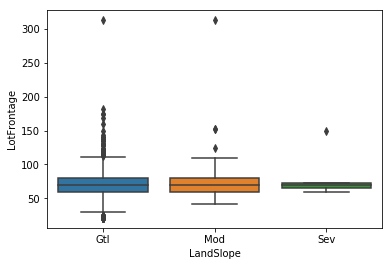

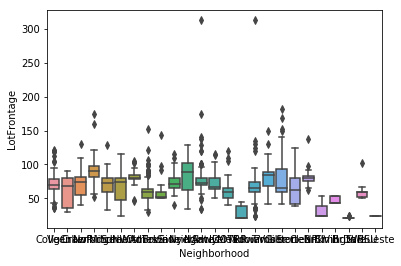

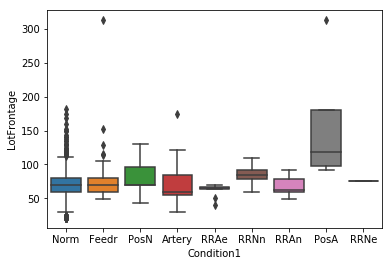

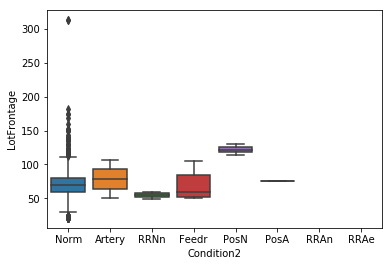

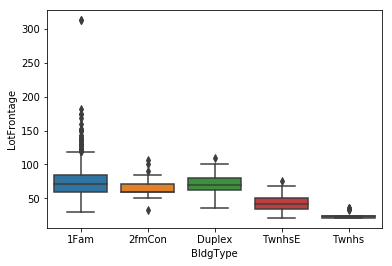

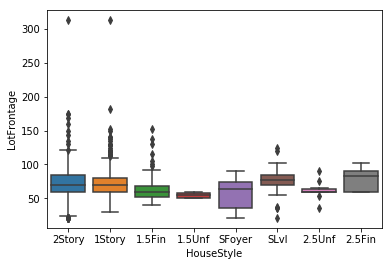

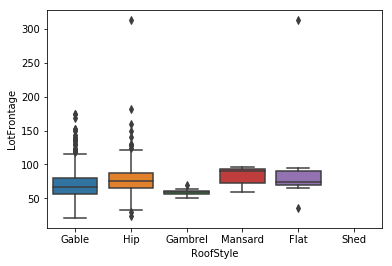

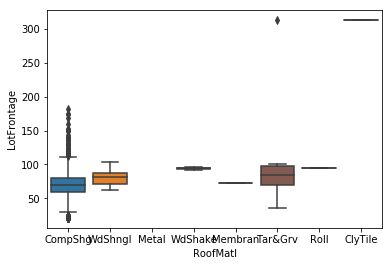

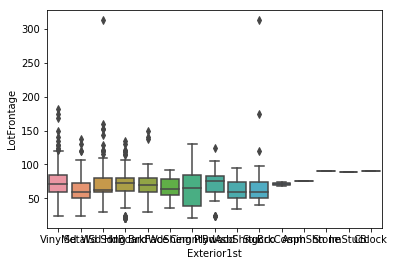

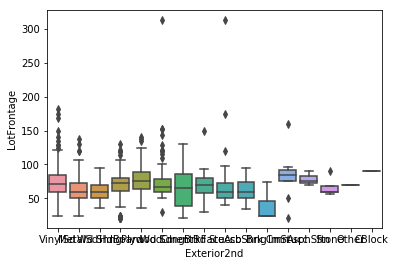

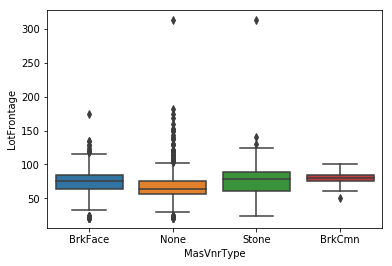

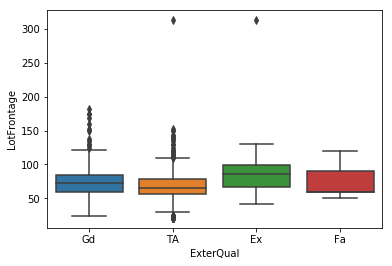

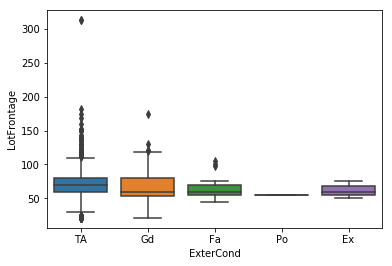

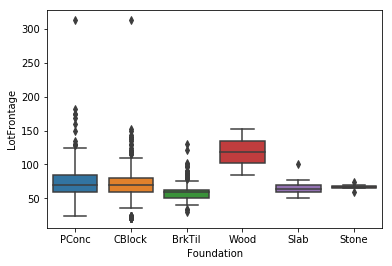

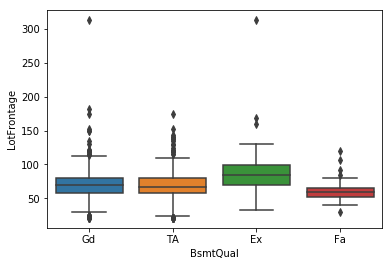

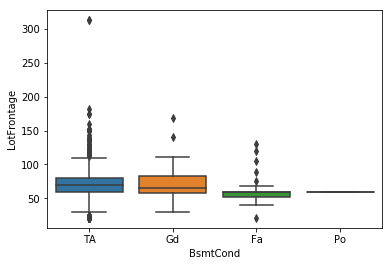

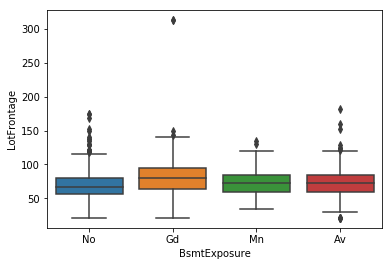

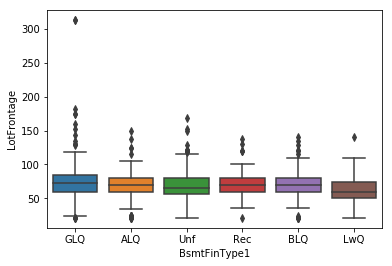

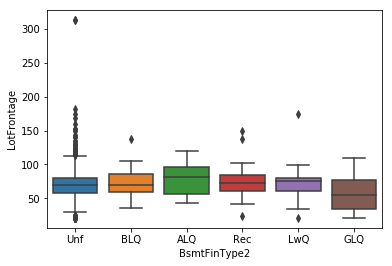

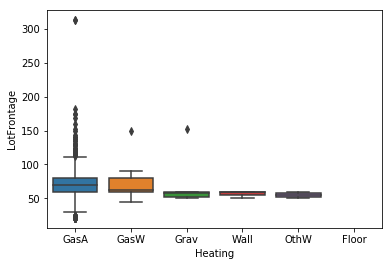

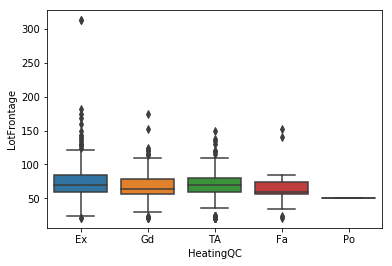

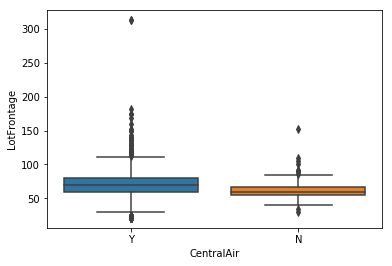

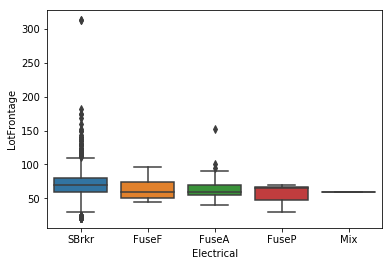

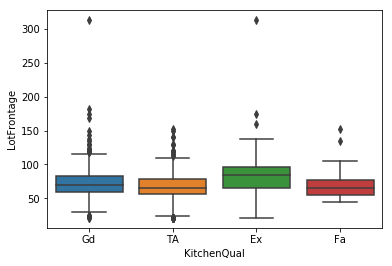

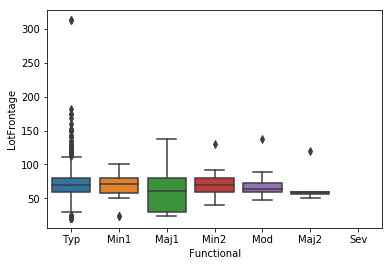

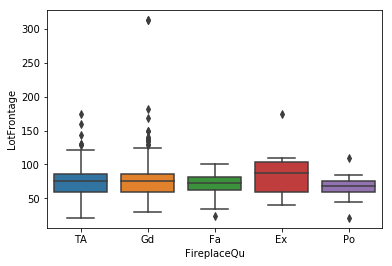

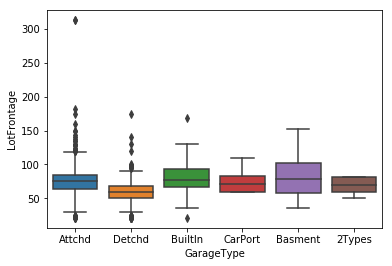

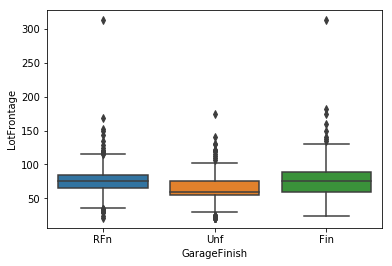

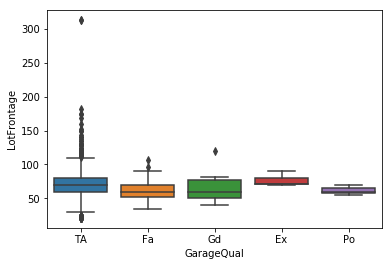

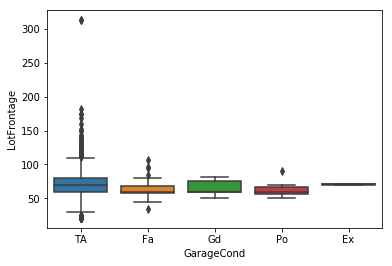

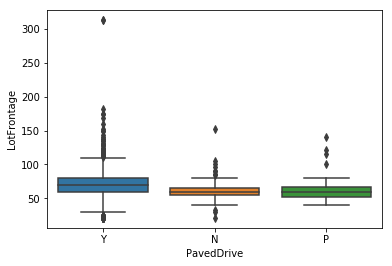

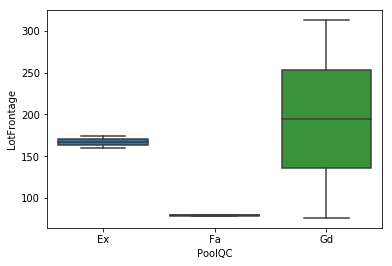

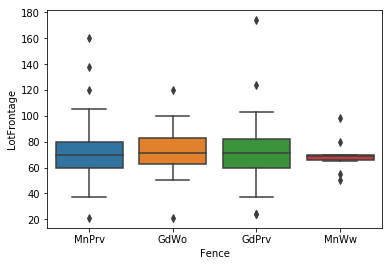

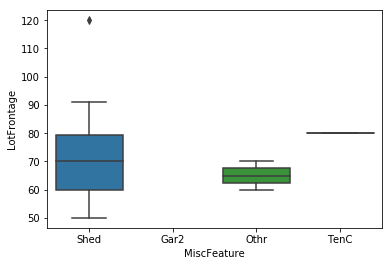

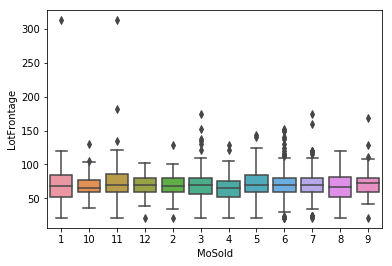

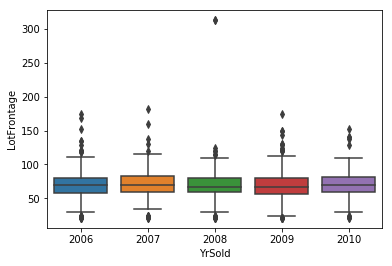

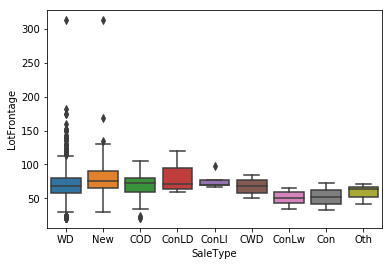

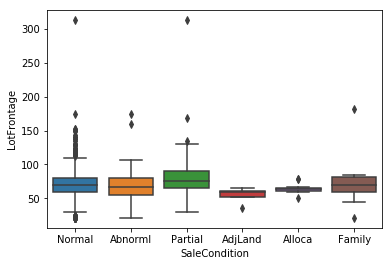

In [743]:
for i, col in enumerate(categorical_features):
    plt.figure(i)
    sns.boxplot(categorical_features[col], train.LotFrontage)

In [153]:
def categorical_counter(variable):
    train_c = Counter(train[variable])
    test_c = Counter(test[variable])
    full_c = Counter(full[variable])
    print(train_c, test_c, full_c)

In [155]:
categorical_counter('MSZoning')

Counter({'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10}) Counter({'RL': 1114, 'RM': 242, 'FV': 74, 'C (all)': 15, 'RH': 10, nan: 4}) Counter({'RL': 2265, 'RM': 460, 'FV': 139, 'RH': 26, 'C (all)': 25, nan: 4})


In [142]:
str(Counter(train.MSZoning))

"Counter({'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10})"

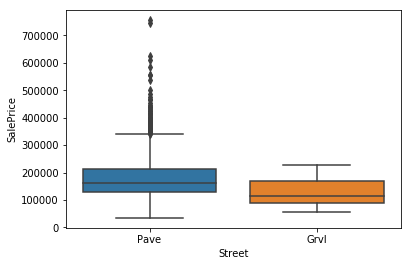

In [194]:
sns.boxplot(train.Street,y)

In [195]:
import scipy

In [198]:
train.groupby('Street')

/Users/lujian/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


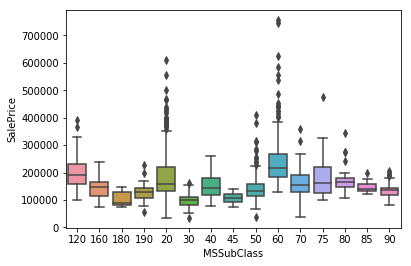

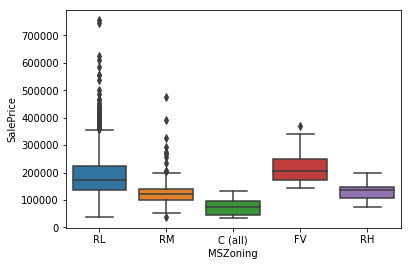

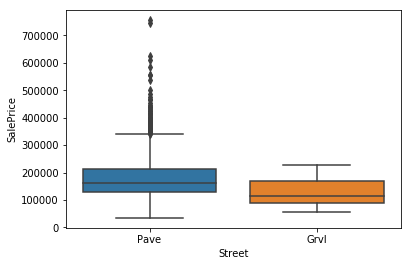

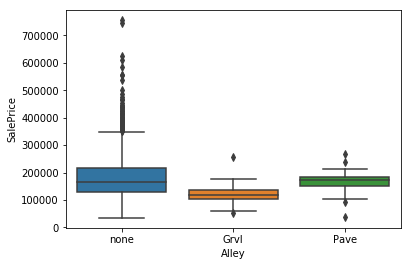

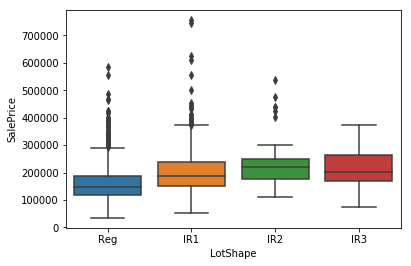

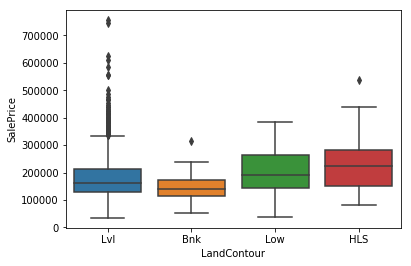

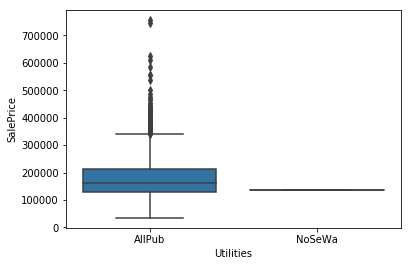

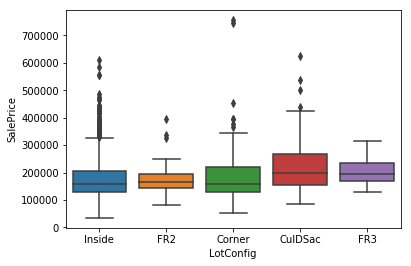

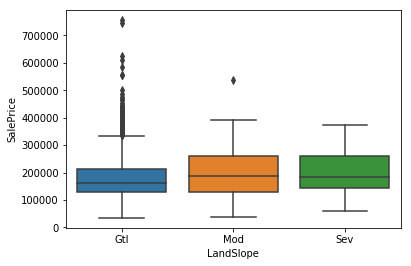

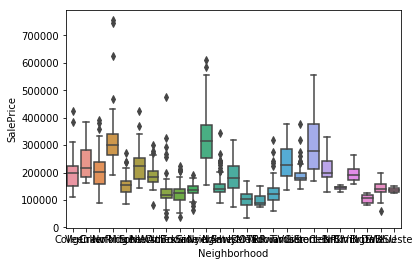

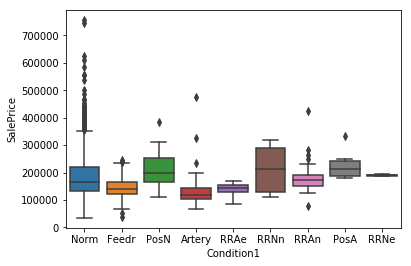

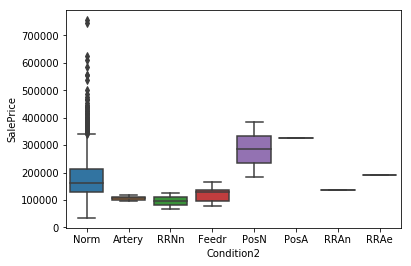

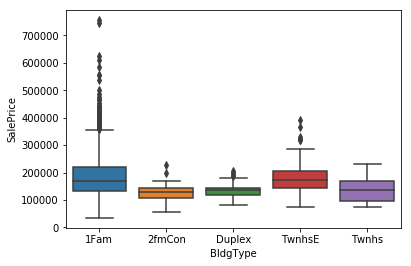

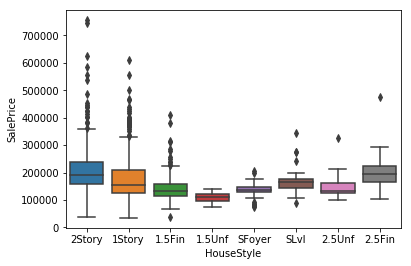

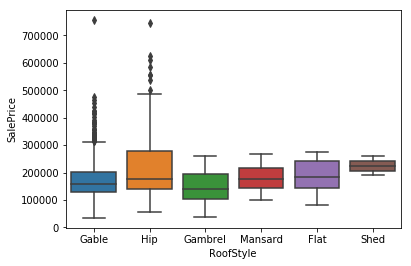

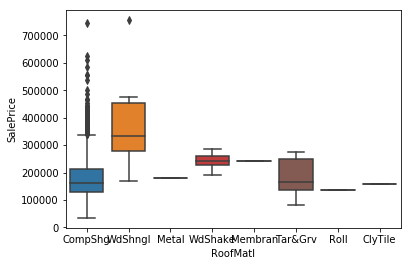

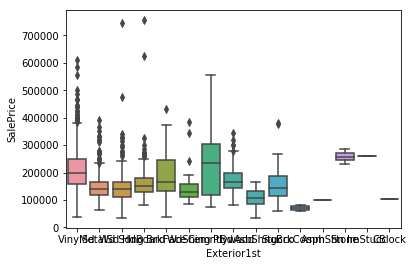

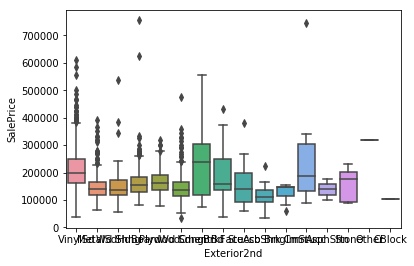

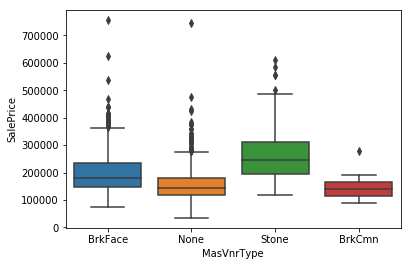

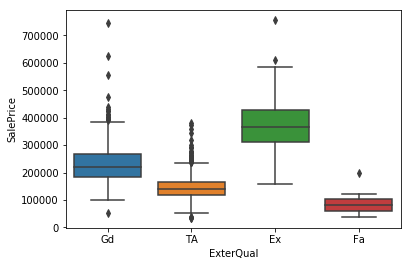

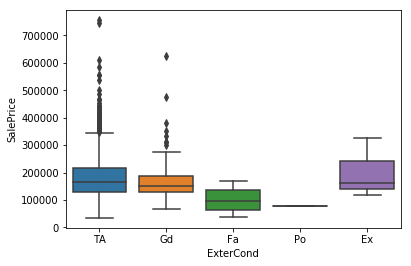

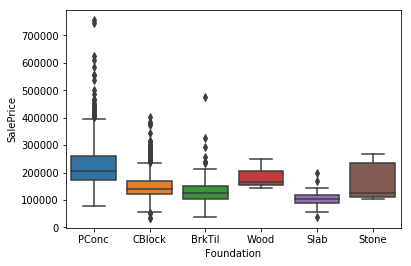

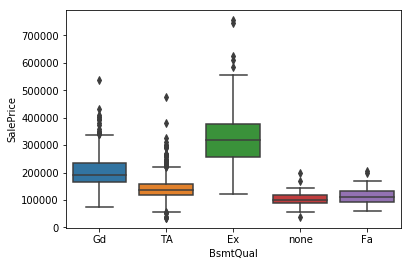

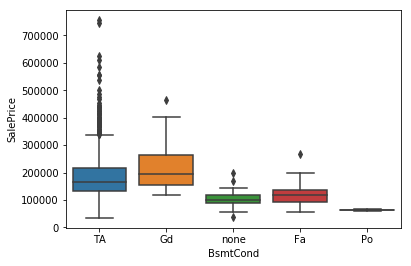

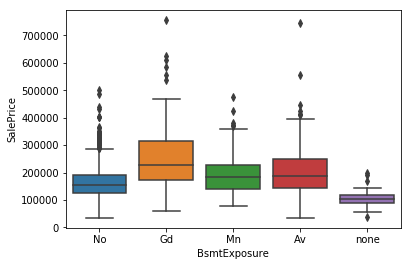

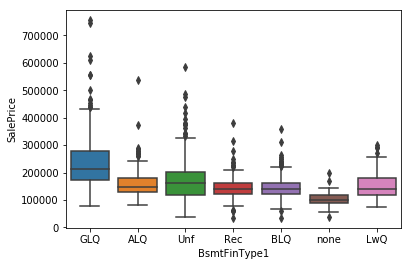

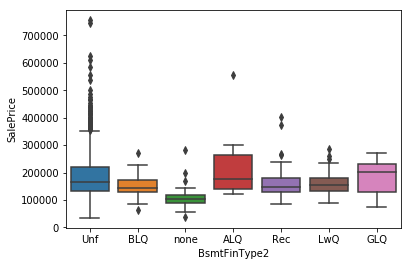

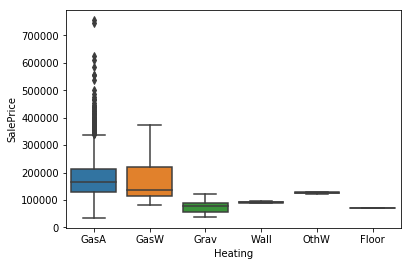

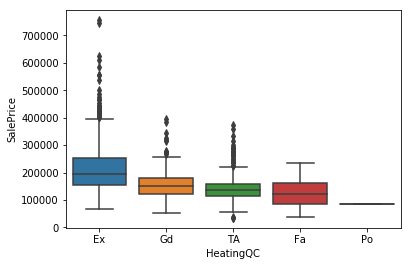

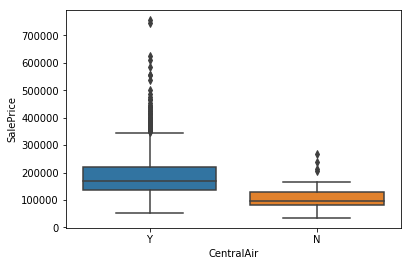

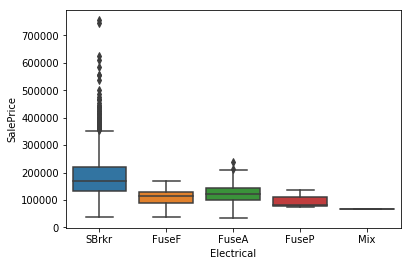

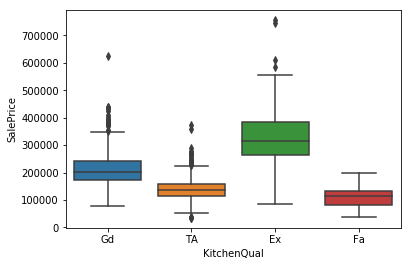

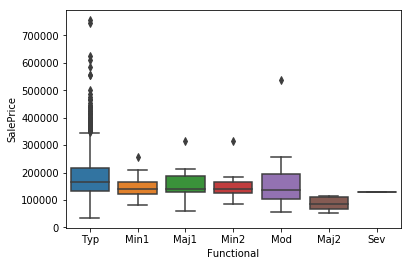

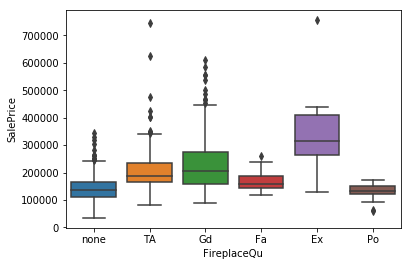

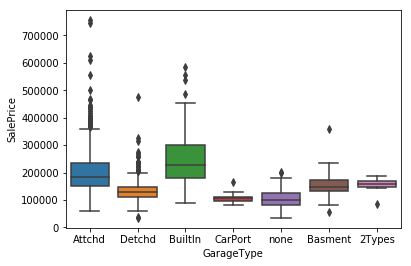

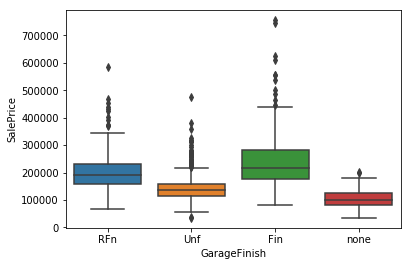

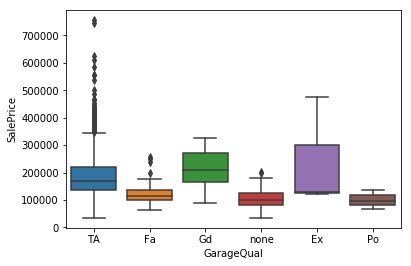

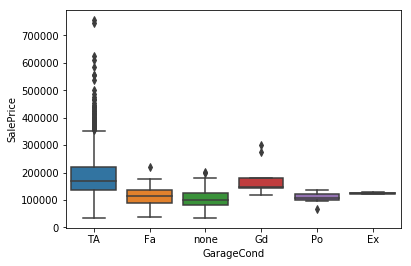

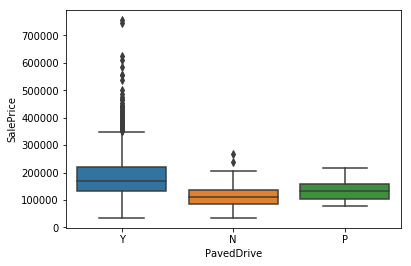

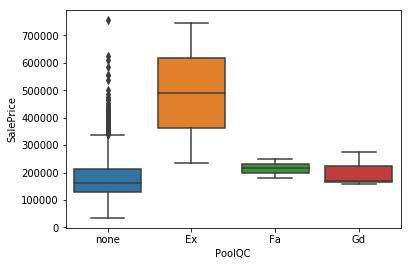

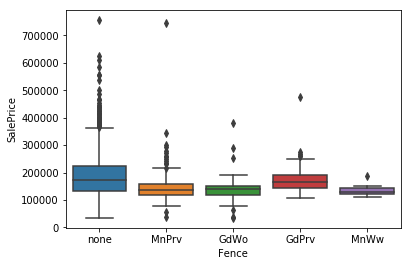

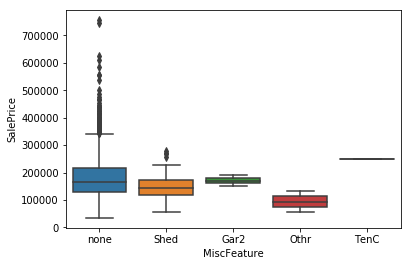

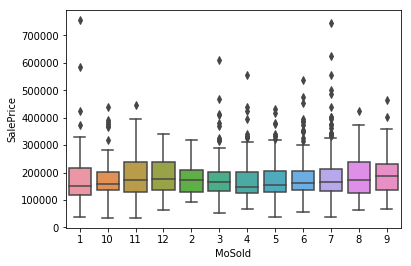

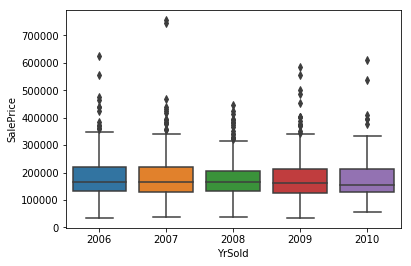

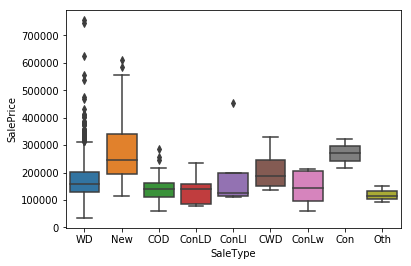

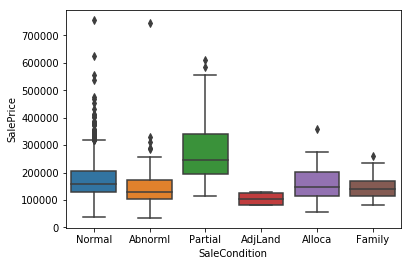

In [207]:
for i in train:
    if i in list(categorical_features):
        plt.figure(i)
        sns.boxplot(train[i],y)

In [219]:
nobsmt = train[train['BsmtCond']=='none']
poorbsmt = train[train['BsmtCond']=='Po']

In [220]:
y[nobsmt['Id']].mean()

196426.45945945947

In [221]:
y[poorbsmt['Id']].mean()

194500.0

In [225]:
group = test.groupby('BsmtCond')

In [226]:
group.size()

BsmtCond
Fa        59
Gd        57
Po         3
TA      1295
none      45
dtype: int64